In [1]:
import iris
import matplotlib.pyplot as plt
import iris.plot as iplt
import iris.quickplot as qplt

import cmocean

import numpy

import warnings
warnings.filterwarnings('ignore')

from iris.experimental.equalise_cubes import equalise_attributes

In [2]:
%matplotlib inline 

In [3]:
infile1 = '/g/data/r87/dbi599/DRSv2/CMIP5/NorESM1-M/historical/yr/ocean/r1i1p1/thetao/latest/thetao-zonal-mean_Oyr_NorESM1-M_historical_r1i1p1_185001-185312.nc'
infile2 = '/g/data/r87/dbi599/DRSv2/CMIP5/CSIRO-Mk3-6-0/historical/yr/ocean/r1i1p1/thetao/latest/thetao-zonal-mean_Oyr_CSIRO-Mk3-6-0_historical_r1i1p1_all.nc'

In [39]:
cube1_grid1 = iris.load_cube(infile1, 'sea_water_potential_temperature')[0, ::]
cube1_grid1.remove_coord('time')

new_aux_coord = iris.coords.AuxCoord(1, long_name='ensemble_member', units='no_unit')
cube1_grid1.add_aux_coord(new_aux_coord)

cube1_grid1

<iris 'Cube' of sea_water_potential_temperature / (K) (depth: 70; latitude: 96)>

In [40]:
cube2_grid2 = iris.load_cube(infile2, 'sea_water_potential_temperature')[0, ::]
cube2_grid2.remove_coord('time')

new_aux_coord = iris.coords.AuxCoord(2, long_name='ensemble_member', units='no_unit')
cube2_grid2.add_aux_coord(new_aux_coord)

cube2_grid2

<iris 'Cube' of sea_water_potential_temperature / (K) (depth: 31; latitude: 189)>

## Regrid to a common grid

The regrid function can only be used for remapping to a different horizontal grid.

Instead, need to use interpolate.

In [41]:
sample_points_grid1 = [('depth', cube1_grid1.coord('depth').points),
                       ('latitude',  cube1_grid1.coord('latitude').points)]

cube2_grid1 = cube2_grid2.interpolate(sample_points_grid1, iris.analysis.Linear())
cube2_grid1.coord('latitude').bounds = cube1_grid1.coord('latitude').bounds
cube2_grid1.coord('depth').bounds = cube1_grid1.coord('depth').bounds

In [42]:
sample_points_grid2 = [('depth', cube2_grid2.coord('depth').points),
                       ('latitude',  cube2_grid2.coord('latitude').points)]

cube1_grid2 = cube1_grid1.interpolate(sample_points_grid2, iris.analysis.Linear())
cube1_grid2.coord('latitude').bounds = cube2_grid2.coord('latitude').bounds
cube1_grid2.coord('depth').bounds = cube2_grid2.coord('depth').bounds

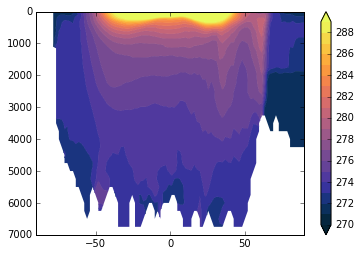

In [43]:
cf = iplt.contourf(cube1_grid1, cmap=cmocean.cm.thermal, levels=numpy.arange(270, 290, 1), extend='both')
cbar = plt.colorbar(cf)
plt.ylim(7000, 0)
plt.show()

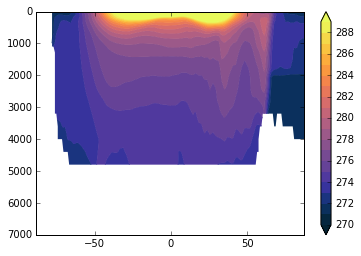

In [44]:
cf = iplt.contourf(cube1_grid2, cmap=cmocean.cm.thermal, levels=numpy.arange(270, 290, 1), extend='both')
cbar = plt.colorbar(cf)
plt.ylim(7000, 0)
plt.show()

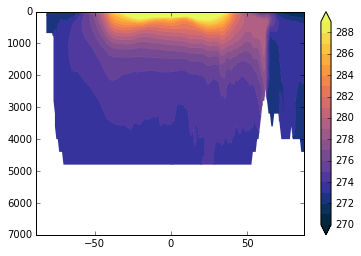

In [45]:
cf = iplt.contourf(cube2_grid2, cmap=cmocean.cm.thermal, levels=numpy.arange(270, 290, 1), extend='both')
cbar = plt.colorbar(cf)
plt.ylim(7000, 0)
plt.show()

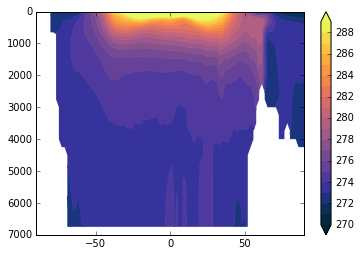

In [46]:
cf = iplt.contourf(cube2_grid1, cmap=cmocean.cm.thermal, levels=numpy.arange(270, 290, 1), extend='both')
cbar = plt.colorbar(cf)
plt.ylim(7000, 0)
plt.show()

## Apply a common mask

In [47]:
cube1_grid1_mask = cube1_grid1.data.mask
cube2_grid1_mask = cube2_grid1.data.mask
grid1_mask = cube1_grid1_mask + cube2_grid1_mask

cube1_grid2_mask = cube1_grid2.data.mask
cube2_grid2_mask = cube2_grid2.data.mask
grid2_mask = cube1_grid2_mask + cube2_grid2_mask

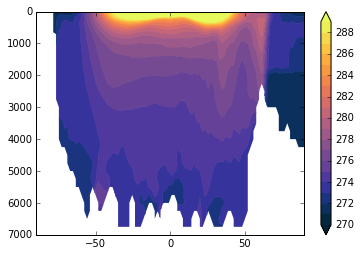

In [48]:
cube1_grid1.data.mask = grid1_mask
cf = iplt.contourf(cube1_grid1, cmap=cmocean.cm.thermal, levels=numpy.arange(270, 290, 1), extend='both')
cbar = plt.colorbar(cf)
plt.ylim(7000, 0)
plt.show()

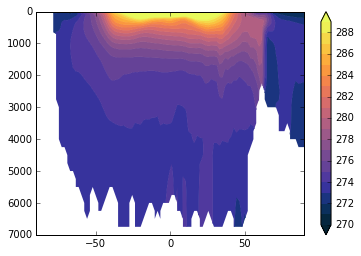

In [49]:
cube2_grid1.data.mask = grid1_mask
cf = iplt.contourf(cube2_grid1, cmap=cmocean.cm.thermal, levels=numpy.arange(270, 290, 1), extend='both')
cbar = plt.colorbar(cf)
plt.ylim(7000, 0)
plt.show()

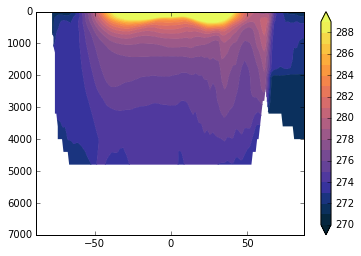

In [50]:
cube1_grid2.data.mask = grid2_mask
cf = iplt.contourf(cube1_grid2, cmap=cmocean.cm.thermal, levels=numpy.arange(270, 290, 1), extend='both')
cbar = plt.colorbar(cf)
plt.ylim(7000, 0)
plt.show()

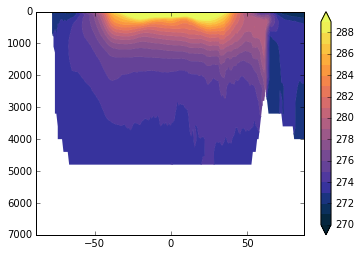

In [51]:
cube2_grid2.data.mask = grid2_mask
cf = iplt.contourf(cube2_grid2, cmap=cmocean.cm.thermal, levels=numpy.arange(270, 290, 1), extend='both')
cbar = plt.colorbar(cf)
plt.ylim(7000, 0)
plt.show()

## Ensemble mean

In [52]:
def ensmean(cube_list):
    """Calculate the ensemble mean"""

    cube_list = iris.cube.CubeList(cube_list)
    equalise_attributes(cube_list)
    ensemble_cube = cube_list.merge_cube()
    ensemble_mean = ensemble_cube.collapsed('ensemble_member', iris.analysis.MEAN)

    return ensemble_mean

In [53]:
cube1_grid1.data = cube1_grid1.data.astype(numpy.float32)
cube2_grid1.data = cube1_grid1.data.astype(numpy.float32)

cube1_grid1.cell_methods = ()
cube2_grid1.cell_methods = ()

ensmean_grid1 = ensmean((cube1_grid1, cube2_grid1))

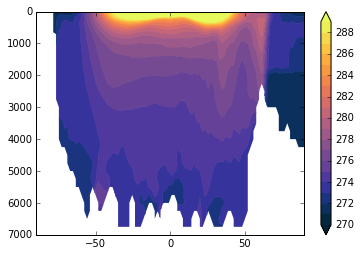

In [54]:
cf = iplt.contourf(ensmean_grid1, cmap=cmocean.cm.thermal, levels=numpy.arange(270, 290, 1), extend='both')
cbar = plt.colorbar(cf)
plt.ylim(7000, 0)
plt.show()

In [55]:
cube1_grid2.data = cube1_grid2.data.astype(numpy.float32)
cube2_grid2.data = cube1_grid2.data.astype(numpy.float32)

cube1_grid2.cell_methods = ()
cube2_grid2.cell_methods = ()

ensmean_grid2 = ensmean((cube1_grid2, cube2_grid2))

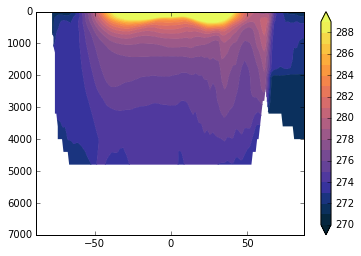

In [56]:
cf = iplt.contourf(ensmean_grid2, cmap=cmocean.cm.thermal, levels=numpy.arange(270, 290, 1), extend='both')
cbar = plt.colorbar(cf)
plt.ylim(7000, 0)
plt.show()